### Dataset Information

   This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.Any patient whose age exceeded 89 is listed as being of age "90".
    
### Attribute Information:
1. Age Age of the patient
2. Gender Gender of the patient
3. TB Total Bilirubin
4. DB Direct Bilirubin
5. Alkphos Alkaline Phosphotase
6. Sgpt Alamine Aminotransferase
7. Sgot Aspartate Aminotransferase
8. TP Total Protiens
9. ALB Albumin
10. A/G Ratio Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts)

Dataset can be downloaded from <a href="https://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29">here</a>
<br><br>

Importing the required PYPI modules:

In [1]:
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Reading the input dataset:

In [2]:
df = pd.read_csv(
    "Indian Liver Patient Dataset (ILPD).csv",
    header=None,
    names=["age", "gender", "totalbilirubin", "directbilirubin",
           "ALP", "ALT", "AST", "totalprotien", "ALB", "A/G", "target"]
)
print(f"The input dataset has - {df.shape} (rows, columns)")
df.head()

The input dataset has - (583, 11) (rows, columns)


,age,gender,totalbilirubin,directbilirubin,ALP,ALT,AST,totalprotien,ALB,A/G,target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Changing the encoding of the target variable:

In [3]:
df.target = df.target.replace({1: "Liver Disease", 2: "Healthy"})

Checking for missing values in the dataset:

In [4]:
df.isnull().sum()

age                0
gender             0
totalbilirubin     0
directbilirubin    0
ALP                0
ALT                0
AST                0
totalprotien       0
ALB                0
A/G                4
target             0
dtype: int64

Dropping the missing values in the dataset:

In [5]:
df = df.dropna()

Generating summary statistics for each column in the dataset:

In [6]:
df.describe(include="all").T.reset_index().rename(
    columns={"index": "variable_name"}).fillna("-")

,variable_name,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,age,579.0,-,-,-,44.7824,16.2218,4,33,45,58,90
1,gender,579.0,2,Male,439,-,-,-,-,-,-,-
2,totalbilirubin,579.0,-,-,-,3.31537,6.22772,0.4,0.8,1,2.6,75
3,directbilirubin,579.0,-,-,-,1.49413,2.8165,0.1,0.2,0.3,1.3,19.7
4,ALP,579.0,-,-,-,291.366,243.562,63,175.5,208,298,2110
5,ALT,579.0,-,-,-,81.1261,183.183,10,23,35,61,2000
6,AST,579.0,-,-,-,110.415,289.85,10,25,42,87,4929
7,totalprotien,579.0,-,-,-,6.48169,1.08464,2.7,5.8,6.6,7.2,9.6
8,ALB,579.0,-,-,-,3.13851,0.794435,0.9,2.6,3.1,3.8,5.5
9,A/G,579.0,-,-,-,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8


Generating a correlation matrix:

In [7]:
(df[["age", "totalbilirubin", "directbilirubin", "ALP", "ALT", "AST", "totalprotien", "ALB", "A/G"]]
 .corr().style.background_gradient(cmap='coolwarm'))

,age,totalbilirubin,directbilirubin,ALP,ALT,AST,totalprotien,ALB,A/G
age,1.000000,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408
totalbilirubin,0.011000,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267
directbilirubin,0.006784,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125
ALP,0.078878,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166
ALT,-0.087799,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375
AST,-0.020499,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040
totalprotien,-0.186248,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887
ALB,-0.264211,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632
A/G,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000


Implementing a bivariate ANOVA:

In [8]:
variables = []
test_statistic = []
pvalue = []
for variable in ("age", "totalbilirubin", "directbilirubin", "ALP", "ALT", "AST", "totalprotien", "ALB", "A/G"):
    f_test_result = f_classif(
        df[variable].values.reshape(-1, 1), df["target"].values.reshape(-1, 1))
    variables.append(variable)
    test_statistic.append(f_test_result[0][0])
    pvalue.append(f_test_result[1][0])
ftest_df_bivariate = pd.DataFrame({
    "variables": variables, "test_statistic": test_statistic, "pvalue": pvalue
}).sort_values(by="pvalue").reset_index(drop=True)
ftest_df_bivariate

,variables,test_statistic,pvalue
0,directbilirubin,37.254770,1.903211e-09
1,totalbilirubin,29.408343,8.632558e-08
2,ALP,20.074911,8.982060e-06
3,A/G,15.774830,8.036890e-05
4,ALT,15.771965,8.048745e-05
5,ALB,15.114500,1.129411e-04
6,AST,13.615884,2.455184e-04
7,age,10.416384,1.319854e-03
8,totalprotien,0.652681,4.194886e-01


Checking the distributions of different variables:

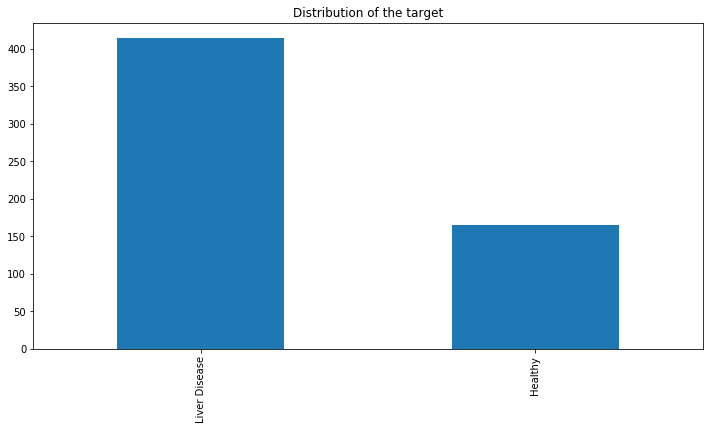

In [9]:
df.target.value_counts().plot(
    kind="bar", title="Distribution of the target", figsize=(12, 6))

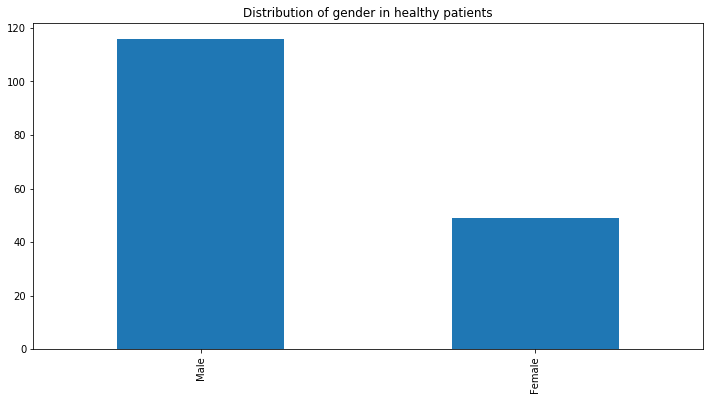

In [10]:
df["gender"][df["target"] == "Healthy"].value_counts().plot(
    kind="bar", title="Distribution of gender in healthy patients",
    figsize=(12, 6)
)

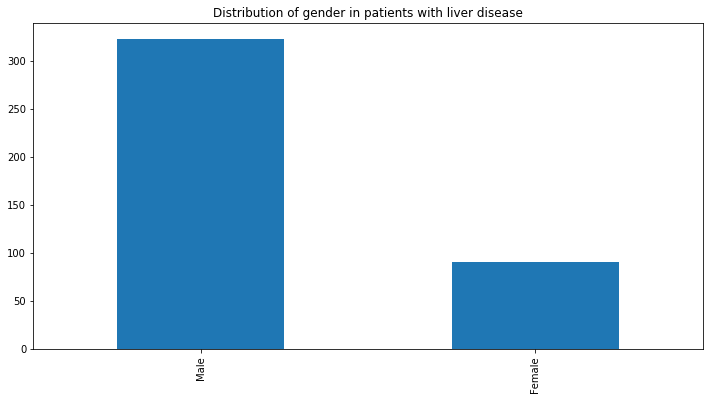

In [11]:
df["gender"][df["target"] == "Liver Disease"].value_counts().plot(
    kind="bar", title="Distribution of gender in patients with liver disease",
    figsize=(12, 6)
)

target
Healthy          AxesSubplot(0.125,0.125;0.775x0.755)
Liver Disease    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

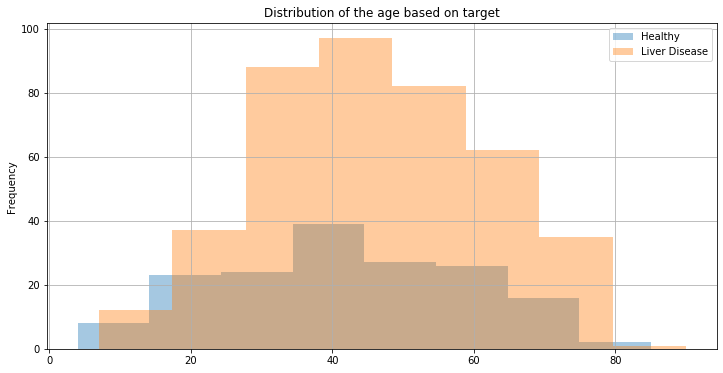

In [12]:
(df[["age", "target"]].groupby("target").age.plot(kind="hist",
                                                  title="Distribution of the age based on target",
                                                  grid="True", figsize=(12, 6), bins=8, by="target", legend=True, alpha=0.4))

target
Healthy          AxesSubplot(0.125,0.125;0.775x0.755)
Liver Disease    AxesSubplot(0.125,0.125;0.775x0.755)
Name: totalbilirubin, dtype: object

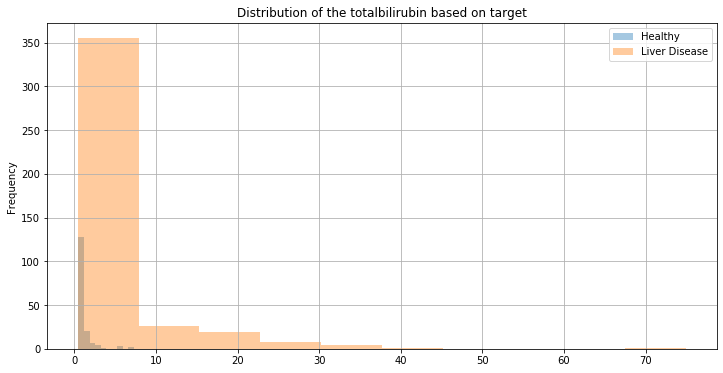

In [13]:
(df[["totalbilirubin", "target"]].groupby("target")["totalbilirubin"]
 .plot(kind="hist", title="Distribution of the totalbilirubin based on target",
       grid="True", figsize=(12, 6), bins=10, legend=True, alpha=0.4))

target
Healthy          AxesSubplot(0.125,0.125;0.775x0.755)
Liver Disease    AxesSubplot(0.125,0.125;0.775x0.755)
Name: directbilirubin, dtype: object

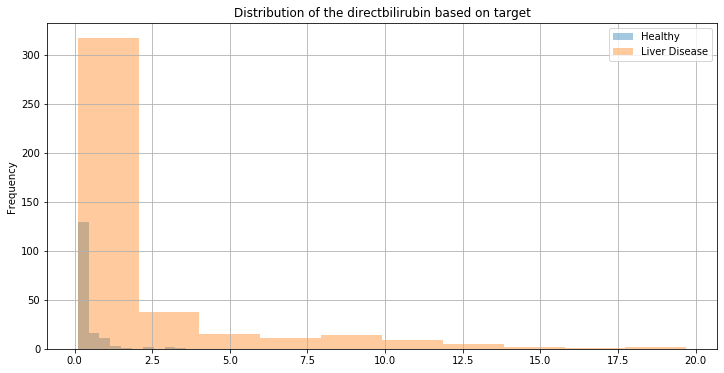

In [14]:
(df[["directbilirubin", "target"]].groupby("target")["directbilirubin"]
 .plot(kind="hist", title="Distribution of the directbilirubin based on target", 
       grid="True", figsize=(12, 6), bins=10, legend=True, alpha=0.4))

target
Healthy          AxesSubplot(0.125,0.125;0.775x0.755)
Liver Disease    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ALP, dtype: object

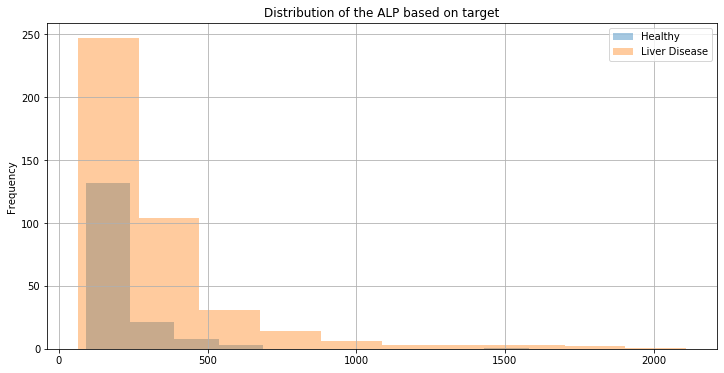

In [15]:
(df[["ALP", "target"]].groupby("target")["ALP"]
 .plot(kind="hist", title="Distribution of the ALP based on target", 
       grid="True", figsize=(12, 6), bins=10, legend=True, alpha=0.4))

target
Healthy          AxesSubplot(0.125,0.125;0.775x0.755)
Liver Disease    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ALT, dtype: object

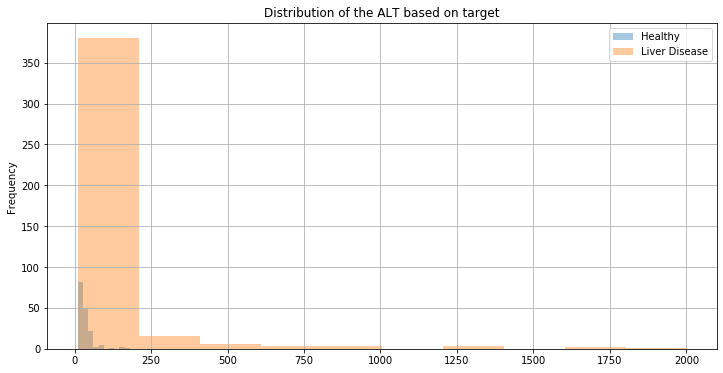

In [16]:
df[["ALT", "target"]].groupby("target")["ALT"].plot(kind="hist",
                                                    title="Distribution of the ALT based on target", grid="True", figsize=(12, 6), bins=10,
                                                    legend=True, alpha=0.4)

target
Healthy          AxesSubplot(0.125,0.125;0.775x0.755)
Liver Disease    AxesSubplot(0.125,0.125;0.775x0.755)
Name: AST, dtype: object

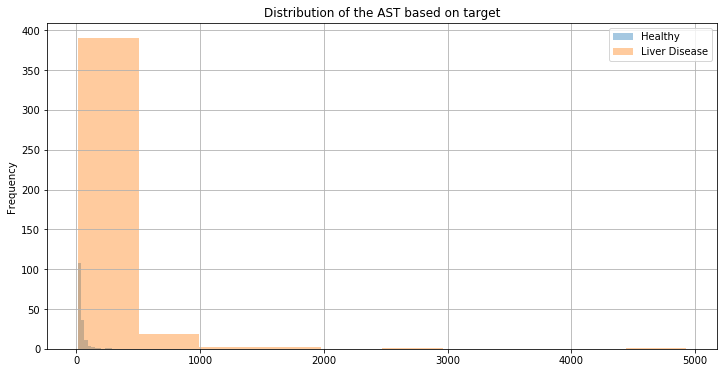

In [17]:
df[["AST", "target"]].groupby("target")["AST"].plot(kind="hist",
                                                    title="Distribution of the AST based on target", grid="True", figsize=(12, 6), bins=10,
                                                    legend=True, alpha=0.4)

target
Healthy          AxesSubplot(0.125,0.125;0.775x0.755)
Liver Disease    AxesSubplot(0.125,0.125;0.775x0.755)
Name: totalprotien, dtype: object

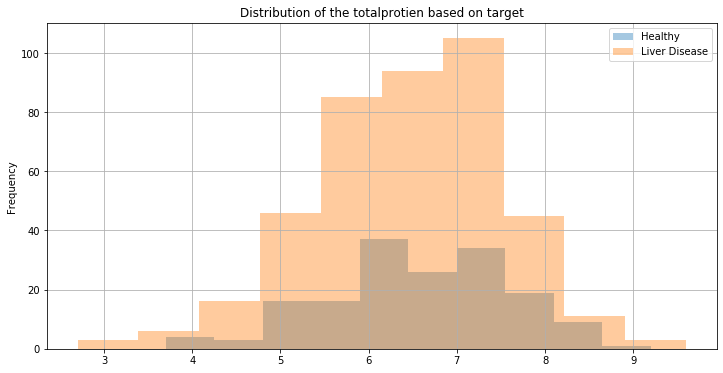

In [18]:
df[["totalprotien", "target"]].groupby("target")["totalprotien"].plot(kind="hist",
                                                                      title="Distribution of the totalprotien based on target", grid="True", figsize=(12, 6), bins=10,
                                                                      legend=True, alpha=0.4)

target
Healthy          AxesSubplot(0.125,0.125;0.775x0.755)
Liver Disease    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ALB, dtype: object

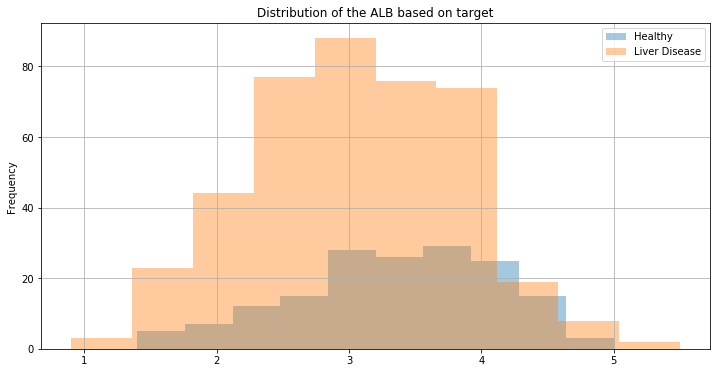

In [19]:
(df[["ALB", "target"]].groupby("target")["ALB"]
 .plot(kind="hist", title="Distribution of the ALB based on target", 
       grid="True", figsize=(12, 6), bins=10, legend=True, alpha=0.4))

target
Healthy          AxesSubplot(0.125,0.125;0.775x0.755)
Liver Disease    AxesSubplot(0.125,0.125;0.775x0.755)
Name: A/G, dtype: object

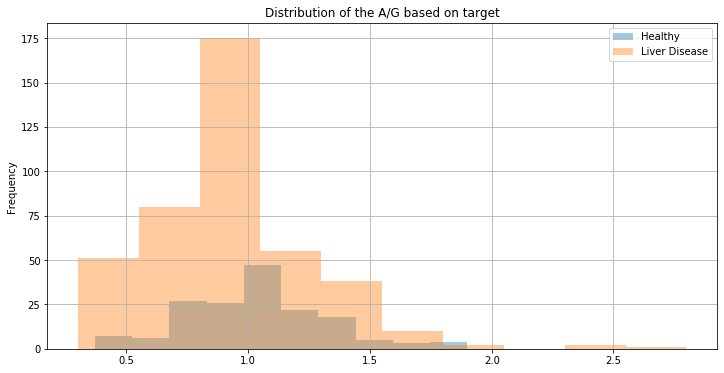

In [20]:
(df[["A/G", "target"]].groupby("target")["A/G"]
 .plot(kind="hist", title="Distribution of the A/G based on target", 
       grid="True", figsize=(12, 6), bins=10, legend=True, alpha=0.4))

Plotting various scatter plots:

In [21]:
df.target = df.target.replace({"Liver Disease": "red", "Healthy": "blue"})

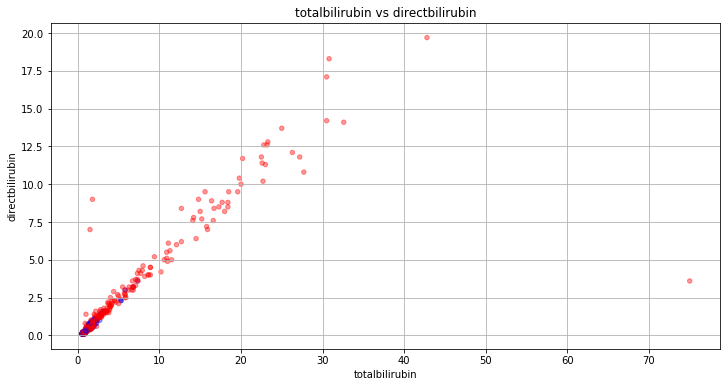

In [22]:
df[["totalbilirubin", "directbilirubin", "target"]].plot(
    x="totalbilirubin", y="directbilirubin", color=df.target, kind="scatter", legend=True, alpha=0.4,
    grid="True", figsize=(12, 6), title="totalbilirubin vs directbilirubin")

Legend: <span style="color:red">Liver Disease</span> <span style="color:blue">Healthy</span>

The zoomed in visualization:

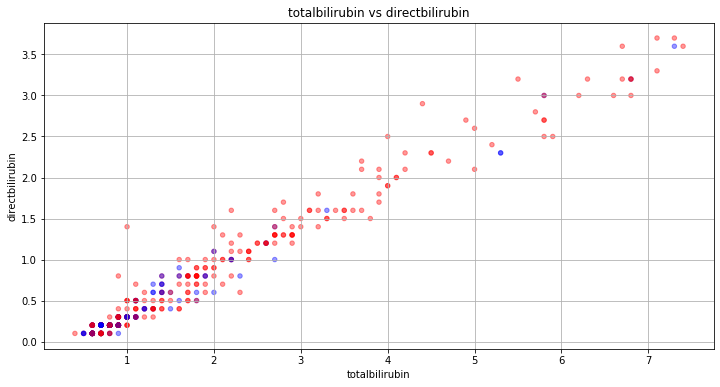

In [23]:
df[["totalbilirubin", "directbilirubin", "target"]][(df["totalbilirubin"] < 7.5) & (df["directbilirubin"] < 4)].plot(
    x="totalbilirubin", y="directbilirubin", color=df.target[(df["totalbilirubin"] < 7.5) & (df["directbilirubin"] < 4)],
    kind="scatter", legend=True, alpha=0.4,
    grid="True", figsize=(12, 6), title="totalbilirubin vs directbilirubin")

Legend: <span style="color:red">Liver Disease</span> <span style="color:blue">Healthy</span>

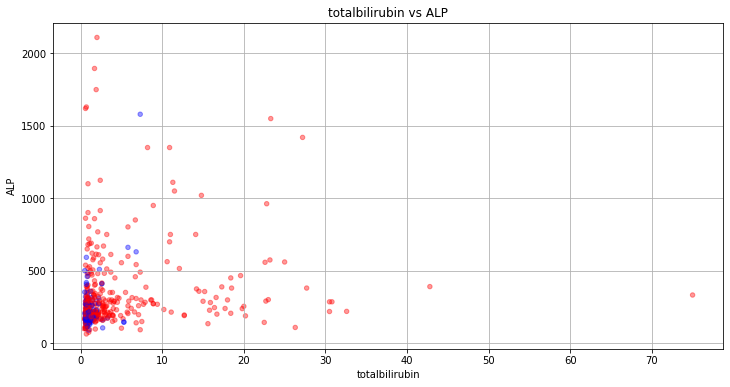

In [24]:
df[["totalbilirubin", "ALP", "target"]].plot(
    x="totalbilirubin", y="ALP", color=df.target, kind="scatter", legend=True, alpha=0.4,
    grid="True", figsize=(12, 6), title="totalbilirubin vs ALP")

Legend: <span style="color:red">Liver Disease</span> <span style="color:blue">Healthy</span>

The zoomed in visualization:

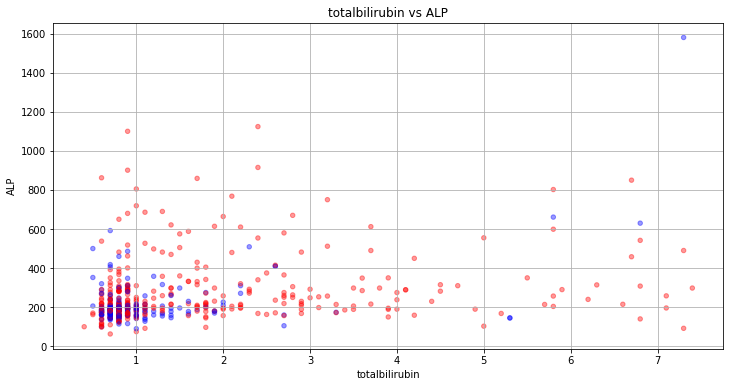

In [25]:
df[["totalbilirubin", "ALP", "target"]][(df["totalbilirubin"] < 7.5) & (df["ALP"] < 1600)].plot(
    x="totalbilirubin", y="ALP", color=df.target[(df["totalbilirubin"] < 7.5) & (df["ALP"] < 1600)],
    kind="scatter", legend=True, alpha=0.4,
    grid="True", figsize=(12, 6), title="totalbilirubin vs ALP")

Legend: <span style="color:red">Liver Disease</span> <span style="color:blue">Healthy</span>

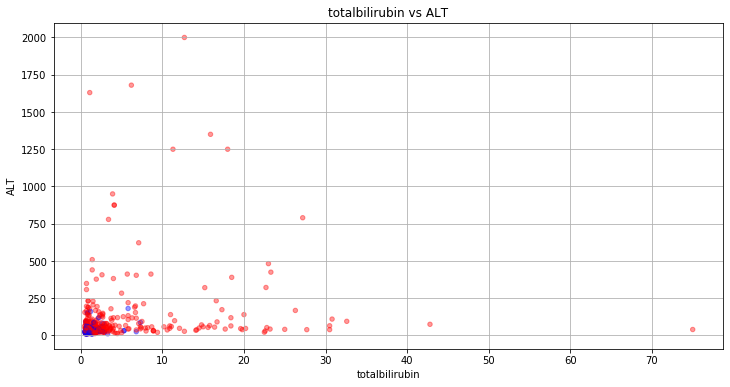

In [26]:
df[["totalbilirubin", "ALT", "target"]].plot(
    x="totalbilirubin", y="ALT", color=df.target, kind="scatter", legend=True, alpha=0.4,
    grid="True", figsize=(12, 6), title="totalbilirubin vs ALT")

Legend: <span style="color:red">Liver Disease</span> <span style="color:blue">Healthy</span>

The zoomed in visualization:

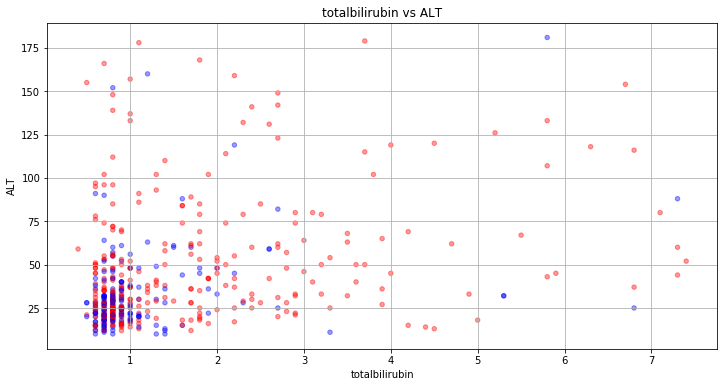

In [27]:
df[["totalbilirubin", "ALT", "target"]][(df["totalbilirubin"] < 7.5) & (df["ALT"] < 185)].plot(
    x="totalbilirubin", y="ALT", color=df.target[(df["totalbilirubin"] < 7.5) & (df["ALT"] < 185)],
    kind="scatter", legend=True, alpha=0.4,
    grid="True", figsize=(12, 6), title="totalbilirubin vs ALT")

Legend: <span style="color:red">Liver Disease</span> <span style="color:blue">Healthy</span>

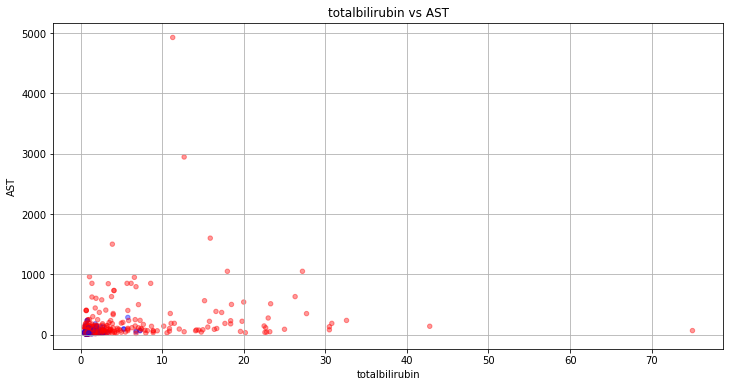

In [28]:
df[["totalbilirubin", "AST", "target"]].plot(
    x="totalbilirubin", y="AST", color=df.target, kind="scatter", legend=True, alpha=0.4,
    grid="True", figsize=(12, 6), title="totalbilirubin vs AST")

Legend: <span style="color:red">Liver Disease</span> <span style="color:blue">Healthy</span>

The zoomed in visualization:

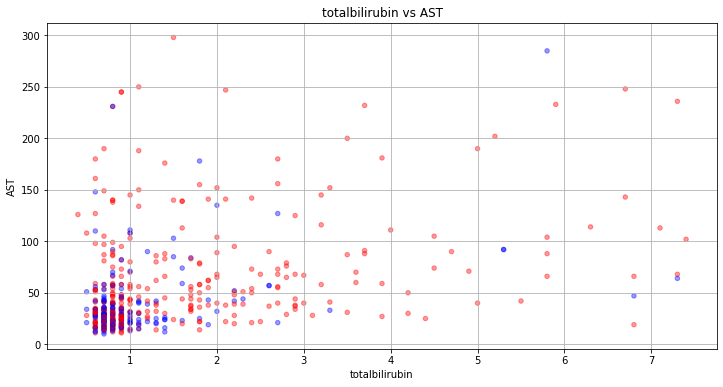

In [29]:
df[["totalbilirubin", "AST", "target"]][(df["totalbilirubin"] < 7.5) & (df["AST"] < 300)].plot(
    x="totalbilirubin", y="AST", color=df.target[(df["totalbilirubin"] < 7.5) & (df["AST"] < 300)],
    kind="scatter", legend=True, alpha=0.4,
    grid="True", figsize=(12, 6), title="totalbilirubin vs AST")

Legend: <span style="color:red">Liver Disease</span> <span style="color:blue">Healthy</span>

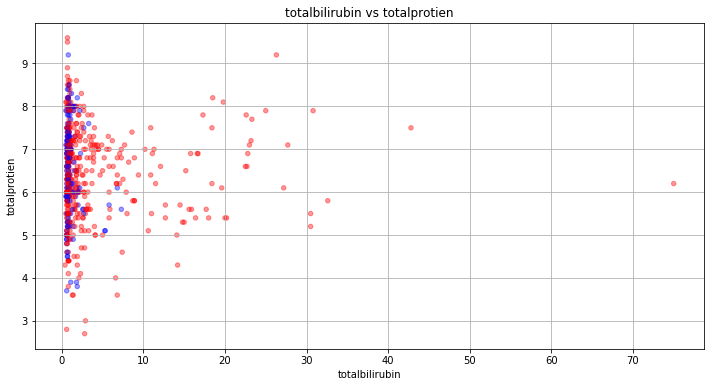

In [30]:
df[["totalbilirubin", "totalprotien", "target"]].plot(
    x="totalbilirubin", y="totalprotien", color=df.target, kind="scatter", legend=True, alpha=0.4,
    grid="True", figsize=(12, 6), title="totalbilirubin vs totalprotien")

Legend: <span style="color:red">Liver Disease</span> <span style="color:blue">Healthy</span>

The zoomed in visualization:

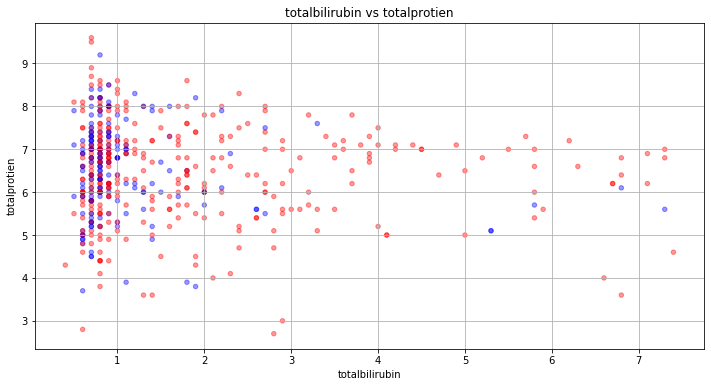

In [31]:
df[["totalbilirubin", "totalprotien", "target"]][(df["totalbilirubin"] < 7.5) & (df["totalprotien"] < 10)].plot(
    x="totalbilirubin", y="totalprotien", color=df.target[(df["totalbilirubin"] < 7.5) & (df["totalprotien"] < 10)],
    kind="scatter", legend=True, alpha=0.4,
    grid="True", figsize=(12, 6), title="totalbilirubin vs totalprotien")

Legend: <span style="color:red">Liver Disease</span> <span style="color:blue">Healthy</span>

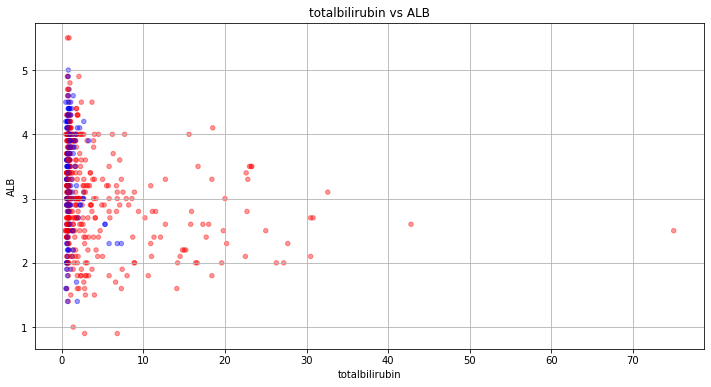

In [32]:
df[["totalbilirubin", "ALB", "target"]].plot(
    x="totalbilirubin", y="ALB", color=df.target, kind="scatter", legend=True, alpha=0.4,
    grid="True", figsize=(12, 6), title="totalbilirubin vs ALB")

Legend: <span style="color:red">Liver Disease</span> <span style="color:blue">Healthy</span>

The zoomed in visualization:

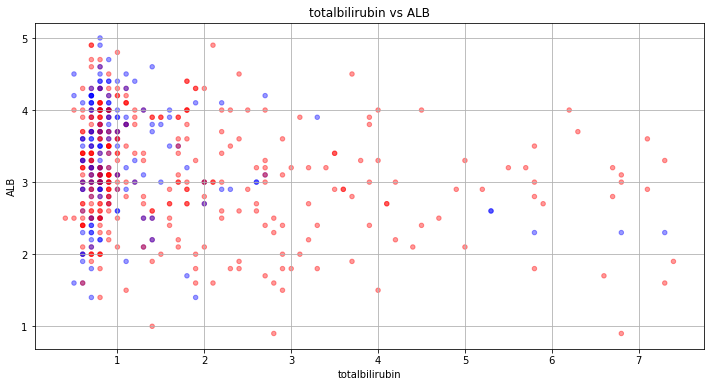

In [33]:
df[["totalbilirubin", "ALB", "target"]][(df["totalbilirubin"] < 7.5) & (df["ALB"] < 5.5)].plot(
    x="totalbilirubin", y="ALB", color=df.target[(df["totalbilirubin"] < 7.5) & (df["ALB"] < 5.5)],
    kind="scatter", legend=True, alpha=0.4,
    grid="True", figsize=(12, 6), title="totalbilirubin vs ALB")

Legend: <span style="color:red">Liver Disease</span> <span style="color:blue">Healthy</span>

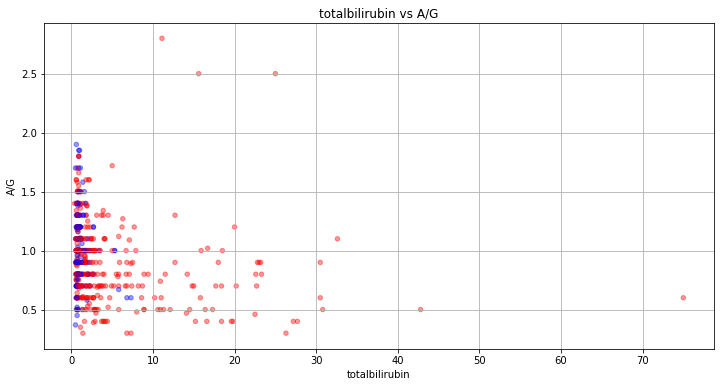

In [34]:
df[["totalbilirubin", "A/G", "target"]].plot(
    x="totalbilirubin", y="A/G", color=df.target, kind="scatter", legend=True, alpha=0.4,
    grid="True", figsize=(12, 6), title="totalbilirubin vs A/G")

Legend: <span style="color:red">Liver Disease</span> <span style="color:blue">Healthy</span>

The zoomed in visualization:

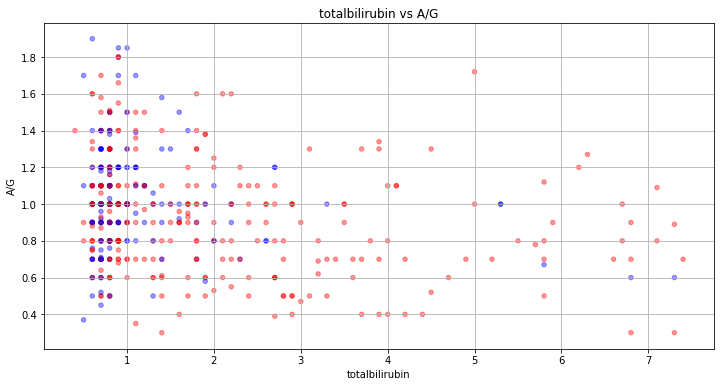

In [35]:
df[["totalbilirubin", "A/G", "target"]][(df["totalbilirubin"] < 7.5) & (df["A/G"] < 20)].plot(
    x="totalbilirubin", y="A/G", color=df.target[(df["totalbilirubin"] < 7.5) & (df["A/G"] < 20)],
    kind="scatter", legend=True, alpha=0.4,
    grid="True", figsize=(12, 6), title="totalbilirubin vs A/G")

Legend: <span style="color:red">Liver Disease</span> <span style="color:blue">Healthy</span>

In [36]:
disease_df = df[(df["totalbilirubin"]>7.5) | (df["A/G"]>20) | (df["ALB"]>5.5) | (df["totalprotien"]>10) | (df["AST"]>300) & 
        (df["ALT"]>185) | (df["ALP"]>1600) | (df["directbilirubin"]>4)]
disease_df["target"].unique()

array(['red'], dtype=object)

There seems to be a overlap of healthy vs unhealthy people with respect to almost all the variables. However we can say that whenever the values of totalbilirubin is greater 7.5 or A/G is greater than 20 or ALB is greater than 5.5 or total protien is greater than 10 or AST is greater than 300 or ALT is greater than 185 and ALP is greater than 1600 the patient has liver disease for sure. The data where there is an overlap, It doesn't appear to be linearly seperable, hence the model that would be a perfect fit would be a support vector machine.

Implementing PCA on the independent variables:

In [37]:
overlap_df = df[(df["totalbilirubin"]<=7.5) & (df["A/G"]<=20) & (df["ALB"]<=5.5) & (df["totalprotien"]<=10) & (df["AST"]<=300) & 
        (df["ALT"]<=185) | (df["ALP"]<=1600) | (df["directbilirubin"]<=4)]
pca = PCA(n_components=2).fit_transform(overlap_df[[
    "age", "totalbilirubin", "directbilirubin", "ALP", "ALT", "AST", "totalprotien", "ALB", "A/G"]])
pca_df = pd.DataFrame(pca).rename(columns={0:"pca1", 1:"pca2"})
pca_df

,pca1,pca2
0,-134.528664,-73.495741
1,82.241569,399.886059
2,2.427092,204.209128
3,-134.996069,-78.517225
4,-92.683039,-75.465777
...,...,...
574,-42.952495,226.217052
575,-136.121931,-165.192515
576,-78.973982,-27.982919
577,-117.195736,-81.229915


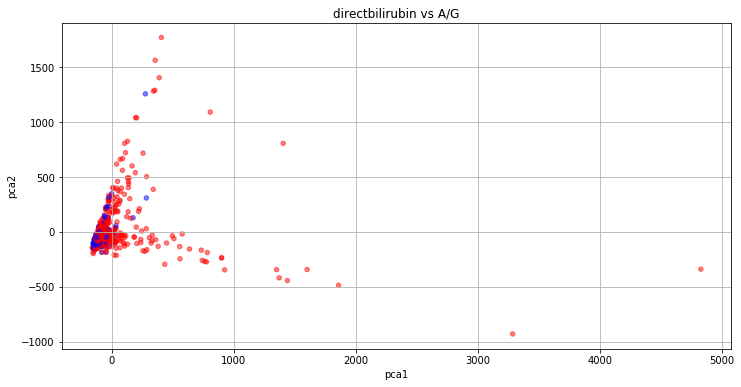

In [38]:
pca_df.plot(kind="scatter", x="pca1", y="pca2", color=overlap_df["target"], legend=True, alpha=0.5,
    grid="True", figsize=(12, 6), title="directbilirubin vs A/G")

The data seems to be seperated by a polynomial curve.

In [39]:
df.target = df.target.replace({"red": 0, "blue": 1})
df.gender = df.gender.replace({"Male": 0, "Female": 1})

Fitting Support Vector Classifier on the entire Dataset:

In [40]:
x_matrix = df[["age", "gender", "totalbilirubin", "directbilirubin", "ALP", "ALT", "AST", "totalprotien", "ALB", "A/G"]]
X_train, X_test, y_train, y_test = train_test_split(
    x_matrix, df["target"], test_size=0.33, random_state=42)

In [41]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
support_vector_classifier = SVC(kernel="poly", degree=30, random_state=42, gamma="auto", coef0=0.45).fit(X_train, y_train)

In [43]:
train_pred = support_vector_classifier.predict(X_train)

In [44]:
pd.crosstab(y_train, columns=train_pred)

col_0,0,1
target,,
0,285,2
1,52,48


In [45]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       287
           1       0.96      0.48      0.64       100

    accuracy                           0.86       387
   macro avg       0.90      0.74      0.78       387
weighted avg       0.88      0.86      0.84       387



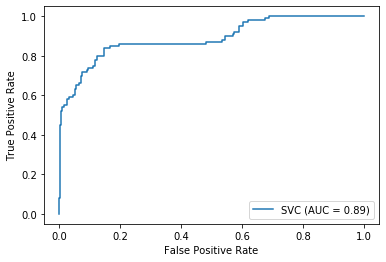

In [46]:
plot_roc_curve(support_vector_classifier, X_train, y_train)

In [47]:
test_pred = support_vector_classifier.predict(X_test)

In [48]:
pd.crosstab(y_test, columns=test_pred)

col_0,0,1
target,,
0,114,13
1,55,10


In [49]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       127
           1       0.43      0.15      0.23        65

    accuracy                           0.65       192
   macro avg       0.55      0.53      0.50       192
weighted avg       0.59      0.65      0.59       192



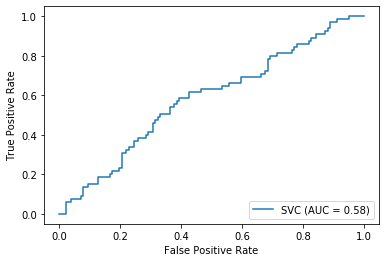

In [50]:
plot_roc_curve(support_vector_classifier, X_test, y_test)

### Conclusion:
**The data doesn't seem to be sufficent to accurately to classify between healthy liver function test vs unhealthy liver function test.**